<a href="https://colab.research.google.com/github/sseyonafre/Project/blob/main/sprint2/AI_14_%E1%84%80%E1%85%A9%E1%84%89%E1%85%A6%E1%84%92%E1%85%B4_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *DATA SCIENCE / SECTION 2 / PROJECT*

#  🏆 프로젝트 목표
>### kbo 승패예측 모델을 만들고 현재기대순위와 지금 순위가 얼마나 다른지, 다르다면 왜 다른지 파악해본다. 또, 어떤 타격지표가 승리에 가장 영향을 미치는지도 파악한다.

## 프로젝트 개요
###1. 문제정의 

>2022년 7월 22일 현재 시즌 전반기가 끝난상황, 모든 팀의 최소목표는 포스트시즌 진출(5위)이다. 
>
>전체 경기의 60%정도 진행된 상황에서 결과를 예측해보고 이에따라 하반기 팀의 전체적인 운용 방향이 크게 달라질 수 있다.
>
>현재 가을야구진출이 불투명한 상황. 확실한 가을야구 진출을 위해서 우리가 어떤 점을 보완할 수 있을 지 알아보려한다.


###2. 프로젝트의 전체적인 순서계획.

> 시즌 순위를 예측하기 위해서 '연'(year)단위 즉, 해당시즌 팀타격기록으로 순위를 예측하면 좋겠지만 데이터의 크기가 너무 작기때문에 매 경기단위로 데이터를 쪼개서 승패여부를 판별한 후, 예측된 승패로 계산된 승률을 토대로 순위 도출.


###3. 타겟정하기

>승리여부 (승리:1, 패:0) -> **분류**
>
>기준모델 : 타겟의 최빈값 -> 0
>
>승리여부와 관계있는 특성은 아무래도 타격은 장타율, 출루율, 투수는 방어율 




#  ⚾️ Data Description
* `game_id` : 경기날짜 + 홈팀+ 원정팀 + 더블헤더유무
* `date`: 경기날짜
* `team` : 팀이름
* `vs` : 상대팀
* `home` : 홈경기 여부
* `PA` : 타석수
* `AB `: 타수 (타석에서 희생타, 볼넷, 몸맞는공 등을 제외)
* `RBI`: 타점 (Run Batted In)
* `RUN` : 득점 
* `HIT `: 총 안타수
* `H2`: 2루타
* `H3`: 3루타
* `HR`: 홈런
* `SB`: 도루성공
* `CS`: 도루실패 
* `SF`: 희생플라이
* `BB` : 볼넷
* `HP `: 몸에 맞는 공 ( hit by pitch)
* `K `: 삼진당한 횟수
* `GD`: 더블플레이 (병살당한 횟수)
* `LOB` : 잔루 (left on base)
* `RISP`: 득점권 타율
* `P_AB_CN `: 득점권 상황
* `P_HIT_CN `: 득점권 상황에서의 안타갯수
* `OBP `: 출루율 (on base rate)
* `avg` : 타율 
* `win `: 승리


#  데이터 탐색


## **1. Gathering Data**

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.3 MB/s 


In [2]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 4.3 MB/s 
     |████████████████████████████████| 303 kB 59.4 MB/s 
     |████████████████████████████████| 596 kB 42.1 MB/s 
     |████████████████████████████████| 690 kB 41.1 MB/s 
     |████████████████████████████████| 102 kB 12.2 MB/s 
     |████████████████████████████████| 3.1 MB 45.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 31.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c173dda21d1cbead3085b4bb66373a564c05812196e11c473fb09d026129c579
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=4cd8ab36d820cc6dc81fdd3b90299e0ae63432c80bcdad42969fc4e6a453cc1d
  Stored in directo

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#https://www.kaggle.com/datasets/park123/korea-baseball-datasetkbo-20152020
#여기서 2015~2020년까지의 데이터 수집한 후
#2021,22년의 데이터는 캐글에 올려진 깃헙에서 연도만 바꿔서 추가수집. 

In [6]:
'''
teamN = {}
teamN['한화'] = '한화'
teamN['KIA'] = 'KIA'
teamN['KT'] = 'KT'
teamN['kt'] = 'KT'
teamN['LG'] = 'LG'
teamN['롯데'] = '롯데'
teamN['NC'] = 'NC'
teamN['두산'] = '두산'
teamN['SK'] = 'SK'
teamN['삼성'] = '삼성'
teamN['키움'] = '키움'
teamN['넥센'] = '넥센'
teamN['SSG'] = 'SSG'
for year in [2018]:

    
    #2015~2020 데이터 수집
    urls = []
    for mon in range(3,11): #3월~10월
        urls.extend(getUrlByMonth(year,mon))

    urls = sorted(urls)

    result = []
    for url in tqdm(urls):


        date = url[url.find("date=")+5:url.find("date")+15]
        source = rq.get(url)

        soup = bs(source.text,'lxml')
        tables = soup.findAll("div",{"class":"box"})
        ###팀명
        title1 = tables[2].find("h3",{"class":"box-title"}).text
        try:
            tn1 = title1[title1.index("(")+1:-1]
        except ValueError:
            print("우천")
            continue
        title2 = tables[2].find("h3",{"class":"box-title"}).text
        tn2 = title1[title1.index("(")+1:-1]


        team1 = {}
        try:
            temp = soup.findAll("td",{"bgcolor":"white"})[0]
        except IndexError:
            print("우천")
            continue

        for idx,x in enumerate(temp.findAll("b")):
            team1[x.text] = temp.contents[2::3][idx]

        team1['팀명'] = tn1

        team2 = {}
        temp = soup.findAll("td",{"bgcolor":"white"})[1]
        for idx,x in enumerate(temp.findAll("b")):
            team2[x.text] = temp.contents[2::3][idx]

        team2['팀명'] = tn1

        gujang = parse.unquote([x for x in url.split("&") if 'stadium' in x][0][8:])
        sil1=tables[6].find("table",{"width":"100%"}).contents[1].text
        sil2=tables[7].find("table",{"width":"100%"}).contents[1].text

        team1['날짜'] =  date
        team1['구장'] = gujang
        team1['실책'] = sil1

        team2['날짜'] =  date
        team2['구장'] = gujang
        team2['실책'] = sil2
        result.append([tatu(tables,0),tatu(tables,2),team1,team2])


    
    fin_=[]
    for r in result:

        team1 = r[0]['title'].iloc[0]
        team2 = r[0]['title'].iloc[-1]

        t1 = r[1][r[1]['이름']=='팀 합계'].iloc[0]
        t2 = r[1][r[1]['이름']=='팀 합계'].iloc[-1]



        dic1 = {}
        tn1 = teamN[team1]
        tn2 = teamN[team2]
        dic1['game_id'] = r[2]['날짜'].replace('-','') + tn1+tn2 + '0'
        dic1['date'] = r[2]['날짜'].replace('-','')
        dic1['team'] = tn1
        dic1['vs'] = tn2
        dic1['home'] = 'T'
        dic1['H_p'] = t1['H']
        dic1['R'] = t1['R']
        dic1['ER'] = t1['ER']
        dic1['BB_p'] = t1['BB']
        dic1['K'] = t1['K']
        dic1['HR_p'] = t1['HR']
        dic1['GO-FO'] = t1['GO-FO']
        dic1['ERA'] = t1['ERA']
        dic1['WHIP'] = t1['WHIP']
        fin_.append(dic1)

        dic1 = {}

        dic1['game_id'] = r[2]['날짜'].replace('-','') + tn1+tn2 + '0'
        dic1['date'] = r[2]['날짜'].replace('-','')
        dic1['team'] = tn2
        dic1['vs'] = tn1
        dic1['home'] = 'T'
        dic1['H_p'] = t2['H']
        dic1['R'] = t2['R']
        dic1['ER'] = t2['ER']
        dic1['BB_p'] = t2['BB']
        dic1['K'] = t2['K']
        dic1['HR_p'] = t2['HR']
        dic1['GO-FO'] = t2['GO-FO']
        dic1['ERA'] = t2['ERA']
        dic1['WHIP'] = t2['WHIP']
        fin_.append(dic1)



    df_ = pd.DataFrame(fin_)

    df_ = df_.drop_duplicates().to_csv(f"bb_{year}.csv",index=False) #export

## 투수데이터 크롤링
''' 

'\nteamN = {}\nteamN[\'한화\'] = \'한화\'\nteamN[\'KIA\'] = \'KIA\'\nteamN[\'KT\'] = \'KT\'\nteamN[\'kt\'] = \'KT\'\nteamN[\'LG\'] = \'LG\'\nteamN[\'롯데\'] = \'롯데\'\nteamN[\'NC\'] = \'NC\'\nteamN[\'두산\'] = \'두산\'\nteamN[\'SK\'] = \'SK\'\nteamN[\'삼성\'] = \'삼성\'\nteamN[\'키움\'] = \'키움\'\nteamN[\'넥센\'] = \'넥센\'\nteamN[\'SSG\'] = \'SSG\'\nfor year in [2018]:\n\n    \n    #2015~2020 데이터 수집\n    urls = []\n    for mon in range(3,11): #3월~10월\n        urls.extend(getUrlByMonth(year,mon))\n\n    urls = sorted(urls)\n\n    result = []\n    for url in tqdm(urls):\n\n\n        date = url[url.find("date=")+5:url.find("date")+15]\n        source = rq.get(url)\n\n        soup = bs(source.text,\'lxml\')\n        tables = soup.findAll("div",{"class":"box"})\n        ###팀명\n        title1 = tables[2].find("h3",{"class":"box-title"}).text\n        try:\n            tn1 = title1[title1.index("(")+1:-1]\n        except ValueError:\n            print("우천")\n            continue\n        title2 = tables[2].find("

In [4]:
from google.colab import files
uploaded = files.upload()

Saving baseball.csv to baseball.csv


In [8]:
#n233a 에서 2015년부터 2022년 까지 데이터를 전부 concat으로 합쳐서 하나의 데이터셋으로 만듦.

In [9]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
df1 = pd.read_csv('bb_2022.csv')
df1

In [ ]:
df1.columns

In [ ]:
df1.drop(columns=['G_ID','VS_T_ID','TB_SC'],inplace=True)

In [ ]:
df1.rename(columns ={'GDAY_DS':'date','T_ID':'team','R':'R_p','H':'H_p','HR':'HR_p','BB':'BB_p','HBP':'HBP_p','K':'K_p'},inplace=True)

In [ ]:
df1['GO'] = df1['GO-FO'].str.split('-').str[0].astype(int)
df1['FO'] = df1['GO-FO'].str.split('-').str[1].astype(int)
df1['GOFO'] = df1['GO'] / df1['FO'] 
df1

In [ ]:
df1.drop(columns=['GO','FO','GO-FO'],inplace=True)

In [ ]:
df1.head()

## **2. 데이터 탐색 및 정제**

In [109]:
df = pd.read_csv('baseball.csv',index_col=0)

In [6]:
#n233a 에서 컬럼이름도 수정하고, 팀이름도 수정하고 필요없는 컬럼 드랍까지 완료한 데이터셋임.

In [110]:
df.head()

,game_id,date,team,vs,home,PA,AB,RBI,RUN,HIT,...,HP,K,GD,LOB,RISP,P_AB_CN,P_HIT_CN,OBP,avg,win
0,20150328HHNE0,20150328,한화,넥센,T,54.0,42.0,4.0,4.0,10.0,...,1.0,7.0,0.0,24.0,0.133333,15,2,0.352941,0.238095,0.0
1,20150328NEHH0,20150328,넥센,한화,B,46.0,40.0,5.0,5.0,8.0,...,0.0,7.0,1.0,18.0,0.090909,11,1,0.304348,0.200000,1.0
2,20150328KTLT0,20150328,KT,롯데,T,46.0,35.0,8.0,9.0,14.0,...,1.0,8.0,1.0,23.0,0.285714,14,4,0.511111,0.400000,0.0
3,20150328LTKT0,20150328,롯데,KT,B,42.0,37.0,12.0,12.0,14.0,...,1.0,8.0,1.0,17.0,0.437500,16,7,0.439024,0.378378,1.0
4,20150328LGHT0,20150328,LG,KIA,T,34.0,29.0,1.0,1.0,7.0,...,0.0,6.0,2.0,17.0,0.200000,10,2,0.333333,0.241379,0.0


In [111]:
#train :2015~2020 시즌, test:2021 ~ 2022상반기.
#8:2 비율로 나누어준뒤, 모델을 교차검증을 시행하겠다.

train = df.query('20150101<date<20210101')
test = df.query('date >20210101')

In [112]:
train.shape , test.shape

((8656, 27), (2286, 27))

#Feature Engineering

In [10]:
#n233a 에서 game_id를 새로 만듦. 
#원래는 날짜+홈팀+원정팀+더블헤더유무여서, 기아와 삼성의 게임이면 기아기준 row 와 삼성기준row 의 gameid가 같아버림.
#그래서 날짜+팀+상대팀+더블헤더유무 로 바꿈.

In [11]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [113]:
pd.options.mode.chained_assignment = None  # default='warn' ,warn 무시.

def eda(df):
    """특성을 엔지니어링 하는 함수입니다."""

    #안타율은 2루타, 3루타 홈런에 대한 가중치가 없으니까 가중치를 줘서 장타율을 만들자.
    #총 밟은 베이스 수로 가중치를 주면 됨. 그래서 hit + h2 + 2*h3 +3*hr /AB 로 구함.
    df['SLG'] = (df['HIT']+ df['H2']+ df['H3']*2 + df['HR']*3) /df['AB']

    #OPS: 출루율과 장타율을 더해줌 -> 공격기여를 한번에 확인할 수 있는 가장 유명한 지표.
    df['OPS']= df['OBP']+df['SLG']
    df['win']=df['win'].replace(0.5,0)       #다중분류가 아닌 이진분류를 위해 무승부를 패로 처리
    df['home']=df['home'].replace({'T':0,'B':1})   
    df.drop(columns=['P_AB_CN','P_HIT_CN','date'],inplace=True)
    for i in ['PA', 'AB', 'RBI', 'RUN',
       'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SF', 'BB', 'HP', 'K', 'GD', 'LOB','win']:
       df[i]= df[i].astype(int)

    return df

train = eda(train)
test = eda(test)    

###데이터 누수방지

feature에 대한 분석을 해보자.

In [115]:
train.columns

Index(['game_id', 'team', 'vs', 'home', 'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2',
       'H3', 'HR', 'SB', 'CS', 'SF', 'BB', 'HP', 'K', 'GD', 'LOB', 'RISP',
       'OBP', 'avg', 'win', 'SLG', 'OPS'],
      dtype='object')

game_id, date 는 제외하고 나머지 피쳐에 대한 분석을 해보면 
>* 수치형 :
       'PA', 'AB', 'RBI', 'RUN','HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SF', 
       'BB', 'HP', 'K', 'GD', 'LOB','RISP','OBP', 'avg', 'SLG', 'OPS'
>* 명목형 : 
         'vs'
>* 이산형 : 
         'home'
         


In [116]:
numerical_features = ['PA', 'AB', 'RBI', 'RUN','HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SF', 
 'BB', 'HP', 'K', 'GD', 'LOB','RISP','OBP', 'avg', 'SLG', 'OPS']

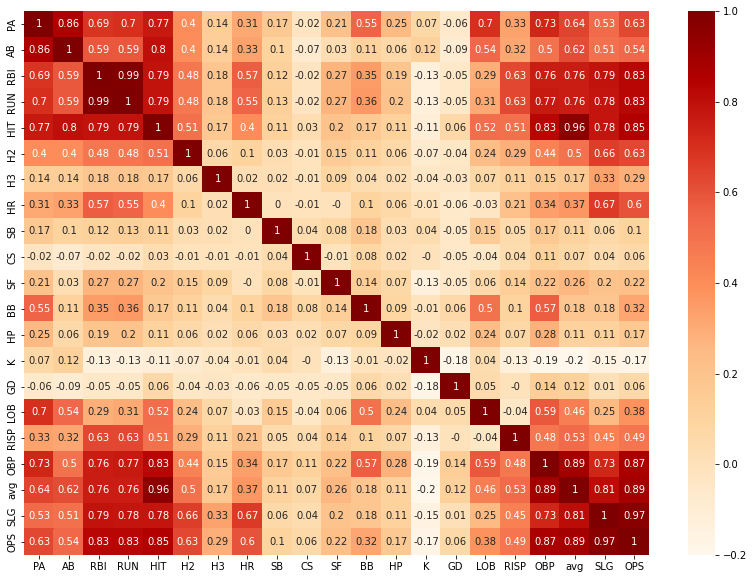

In [117]:
#수치형 변수들의 상관관계.
%matplotlib inline
corr = round(train[numerical_features].corr(),2)
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True, cmap='OrRd');

In [118]:
#PA 와 AB는 제외할거니까 생각하지 않아도 됨. 
#타점과 득점은 상관관계가 0.99로 높음. 둘 중 하나는 제거.
#OPS 와 장타율 역시 상관관계가 높음. 

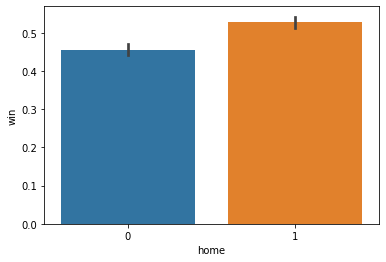

In [119]:
# home 피쳐의 타겟 분포 확인.
sns.barplot(x='home',y='win',data=train);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_

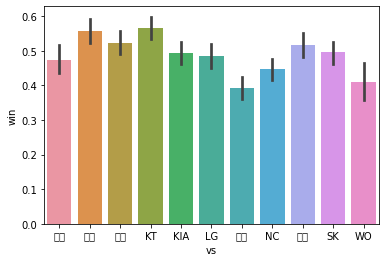

In [120]:
sns.barplot(x='vs',y='win',data=train); #고유값들에 대한 타겟값이 별 차이없음 -> 컬럼삭제.

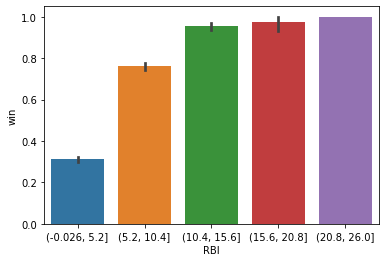

In [121]:
train['RBI'] = pd.cut(train['RBI'], 5)
sns.barplot(x='RBI', y='win', data=train);

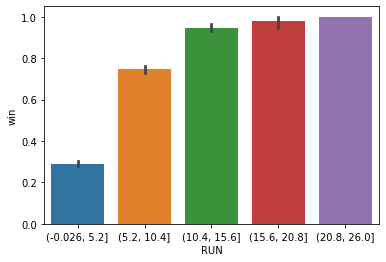

In [122]:
train['RUN'] = pd.cut(train['RUN'], 5)              #RBI 와 RUN 은 상관관계가 높으니 둘 중 하나는 제거!
sns.barplot(x='RUN', y='win', data=train);

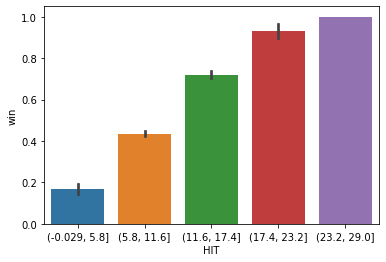

In [123]:
train['HIT'] = pd.cut(train['HIT'], 5)
sns.barplot(x='HIT', y='win', data=train);

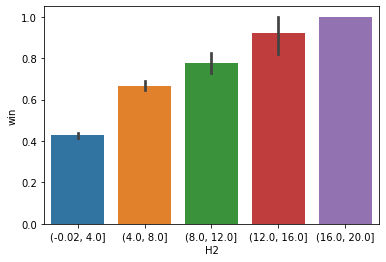

In [124]:
train['H2'] = pd.cut(train['H2'],5)
sns.barplot(x='H2', y='win', data=train);

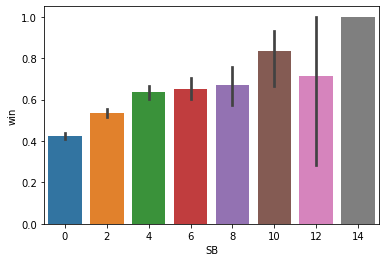

In [126]:
sns.barplot(x='SB',y='win',data=train); #타겟비율의 신뢰구간이 너무 넓음. 통계적 유효성 떨어짐. ->피처로 사용안함.

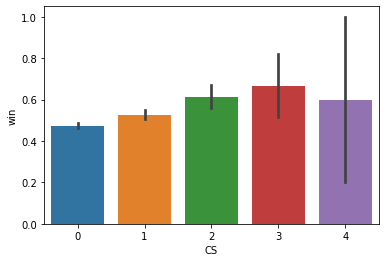

In [127]:
sns.barplot(x='CS',y='win',data=train);   #마찬가지로 제거.

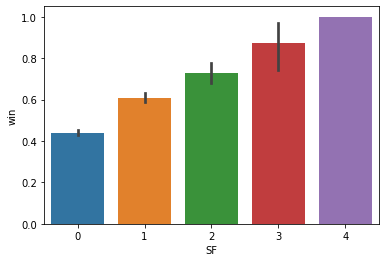

In [128]:
sns.barplot(x='SF',y='win',data=train);

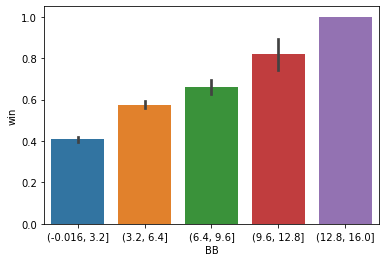

In [129]:
train['BB'] = pd.cut(train['BB'],5)
sns.barplot(x='BB',y='win',data=train);

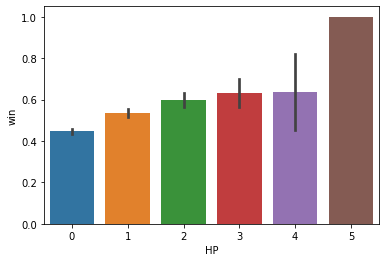

In [130]:
sns.barplot(x='HP',y='win',data=train); #신뢰구간이 넓어서 사용안함.

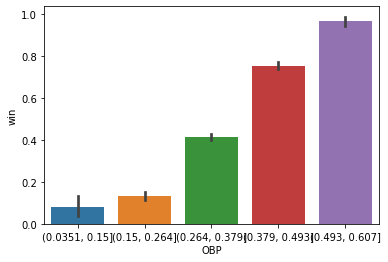

In [136]:
train['OBP'] = pd.cut(train['OBP'], 5)  #OBP,avg,slg,ops,rbi,hit,run 간의 상관관계가 너무 높음....
sns.barplot(x='OBP',y='win',data=train);

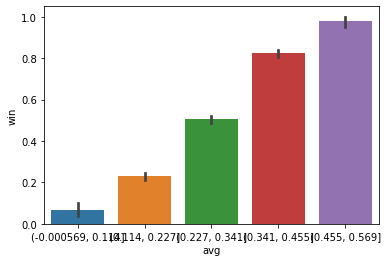

In [135]:
train['avg'] = pd.cut(train['avg'], 5) 
sns.barplot(x='avg',y='win',data=train);

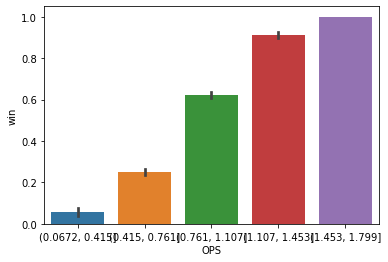

In [134]:
train['OPS'] = pd.cut(train['OPS'], 5) 
sns.barplot(x='OPS',y='win',data=train);

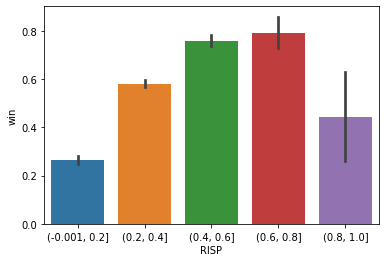

In [139]:
train['RISP'] = pd.cut(train['RISP'], 5)         #구간별 타겟값의 신뢰구간이 넓어서 사용안함.
sns.barplot(x='RISP',y='win',data=train);

In [138]:
# win 과의 상관관계 큰순서.
train.corr().loc['win'].sort_values(ascending=False)

win     1.000000
SLG     0.486945
RISP    0.390980
HR      0.284498
PA      0.260922
SF      0.176544
SB      0.162616
AB      0.132928
HP      0.114651
H3      0.112419
LOB     0.112095
home    0.070942
CS      0.066652
GD     -0.066382
K      -0.189763
Name: win, dtype: float64

#모델링

## **1. 기준모델**

In [140]:
#타겟설정
target = 'win'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.50774
1    0.49226
Name: win, dtype: float64

In [141]:
#기준모델 설정. 
baseline = y_train.mode()
baseline

0    0
dtype: int64

In [142]:
#기준모델의 정확도를 구해보자.
from sklearn.metrics import accuracy_score
y_test = test[target]
y_pred = [baseline] * len(y_test)
print("기준모델 정확도: ", accuracy_score(y_test, y_pred))

기준모델 정확도:  0.5380577427821522


## **2. 로지스틱회귀모델 교차검증수행**

In [194]:
from category_encoders import OneHotEncoder,OrdinalEncoder,TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm

In [147]:
feature = ['RBI','HR','BB','K', 'GD', 'LOB','RISP','OBP', 'avg', 'SLG', 'OPS', 'home']

In [148]:
X_train = train[feature]
X_test = test[feature]

In [186]:
#로지스틱회귀모델을 만들어 교차검증을 수행. #베이지안최적화를 사용해서 최적의 파라미터 찾아보자.

pipe_lr = make_pipeline(
    OrdinalEncoder(), 
    StandardScaler(),

    LogisticRegression(n_jobs=-1)
)

k = 3

scores = cross_val_score(pipe_lr, X_train, y_train, cv=k, 
                         scoring='roc_auc')
print(f'f1 for {k} folds:', scores)
print(f'교차검증 평균:',scores.mean())

f1 for 3 folds: [0.8480364  0.84000529 0.8396414 ]
교차검증 평균: 0.8425610291258244


In [190]:
pipe_lr.fit(X_train,y_train);

In [191]:
y_pred = pipe_lr.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80      1381
           1       0.68      0.79      0.73       905

    accuracy                           0.77      2286
   macro avg       0.76      0.77      0.76      2286
weighted avg       0.78      0.77      0.77      2286



In [162]:
pipe_lr.named_steps['logisticregression'].intercept_

array([0.04753548])

In [164]:
#각 특성의 회귀계수들 
pipe_lr.named_steps['logisticregression'].coef_ 

array([[ 0.46923822, -0.14680001,  0.27417733, -0.28474448, -0.33649471,
        -0.48591161,  0.15618941,  0.5546814 ,  0.17896683,  0.34125802,
         0.38703381,  0.07634778]])

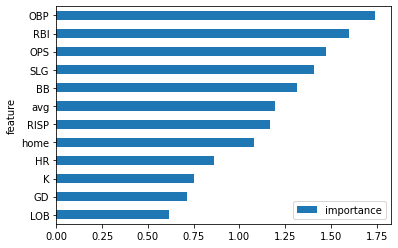

In [161]:
#로지스틱모델 특성중요도.
import math
w0 = pipe_lr.named_steps['logisticregression'].intercept_[0]
w =  pipe_lr.named_steps['logisticregression'].coef_[0]

feature_importance = pd.DataFrame(feature, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()  #출루율, 타점, ops, 장타율, 볼넷, 타율, 득점권타율 순

## **3. 랜덤포레스트모델 교차검증수행**

In [187]:
pipe_rf = make_pipeline(
    OrdinalEncoder(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

k = 3

scores = cross_val_score(pipe_rf, X_train, y_train, cv=k, 
                         scoring='roc_auc')
print(f'f1 for {k} folds:', scores)
print(f'교차검증 평균:',scores.mean())

f1 for 3 folds: [0.83573194 0.827802   0.82516488]
교차검증 평균: 0.8295662729268791


In [184]:
pipe_rf.fit(X_train,y_train);

In [185]:
y_pred = pipe_rf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1339
           1       0.67      0.75      0.71       947

    accuracy                           0.74      2286
   macro avg       0.74      0.75      0.74      2286
weighted avg       0.75      0.74      0.75      2286



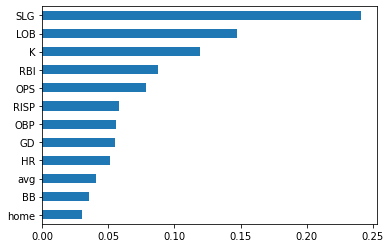

In [172]:
#MDI 특성중요도 .항상 양수값, 각 변수가 split 될 때 불순도 감소분의 평균을 중요도로 정의
model_rf = pipe_rf.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(); #장타율, 잔루, K, 타점, OPS 순으로 로지스틱과 다른양상. 

## **4. xgboost 교차검증수행**

In [188]:
#xgboost 는 랜덤포레스트보다 하이퍼파라미터 셋팅에 민감

pipe_xg = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(random_state=2
                  , n_jobs=-1
                 )
)

k = 3

scores = cross_val_score(pipe_xg, X_train, y_train, cv=k, 
                         scoring='roc_auc')
print(f'f1 for {k} folds:', scores)
print(f'교차검증 평균:',scores.mean())

f1 for 3 folds: [0.8489318  0.84258641 0.84207831]
교차검증 평균: 0.8445321692254436


In [179]:
pipe_xg.fit(X_train,y_train);

In [180]:
y_pred = pipe_xg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1358
           1       0.68      0.78      0.73       928

    accuracy                           0.76      2286
   macro avg       0.76      0.77      0.76      2286
weighted avg       0.77      0.76      0.76      2286



## **5. lightGBM 교차검증수행**